In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_parquet
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [39]:
dataframe = read_parquet('kline_data/kline_data/train_data/1000FLOKIUSDT.parquet')
dataframe.head(5)

,timestamp,open_price,high_price,low_price,close_price,volume,amount,count,buy_volume,buy_amount
0,1683390600000,0.0423100,0.0444600,0.0423100,0.0432000,91614205,3986427.2652500,16405,46218295,2010734.9819600
1,1683391500000,0.0431900,0.0437500,0.0428700,0.0433200,61141456,2646329.8671100,11214,31271274,1353742.8878800
2,1683392400000,0.0433200,0.0436500,0.0429000,0.0432000,51385122,2223310.8747900,8909,26248343,1135844.9290600
3,1683393300000,0.0432100,0.0433000,0.0423900,0.0428600,54321490,2329436.1780000,9208,25720153,1103324.2959700
4,1683394200000,0.0428500,0.0434700,0.0426500,0.0429500,37486122,1616366.3676500,7528,18928398,816380.6000400


In [40]:
dataframe.describe()

,timestamp,count
count,5.807800e+04,58078.000000
mean,1.709525e+12,7152.956076
std,1.508924e+10,12862.852430
min,1.683391e+12,37.000000
25%,1.696458e+12,803.000000
50%,1.709525e+12,3185.500000
75%,1.722593e+12,8167.750000
max,1.735660e+12,425066.000000


In [41]:
tf.random.set_seed(2025)

In [42]:
dataset = dataframe.values
print("前5行所有列:\n", dataset[:5])

前5行所有列:
 [[1683390600000 '0.0423100' '0.0444600' '0.0423100' '0.0432000'
  '91614205' '3986427.2652500' 16405 '46218295' '2010734.9819600']
 [1683391500000 '0.0431900' '0.0437500' '0.0428700' '0.0433200'
  '61141456' '2646329.8671100' 11214 '31271274' '1353742.8878800']
 [1683392400000 '0.0433200' '0.0436500' '0.0429000' '0.0432000'
  '51385122' '2223310.8747900' 8909 '26248343' '1135844.9290600']
 [1683393300000 '0.0432100' '0.0433000' '0.0423900' '0.0428600'
  '54321490' '2329436.1780000' 9208 '25720153' '1103324.2959700']
 [1683394200000 '0.0428500' '0.0434700' '0.0426500' '0.0429500'
  '37486122' '1616366.3676500' 7528 '18928398' '816380.6000400']]


In [43]:
dataset = np.delete(dataset, 0, axis=1)
print("前5行所有列:\n", dataset[:5])

前5行所有列:
 [['0.0423100' '0.0444600' '0.0423100' '0.0432000' '91614205'
  '3986427.2652500' 16405 '46218295' '2010734.9819600']
 ['0.0431900' '0.0437500' '0.0428700' '0.0433200' '61141456'
  '2646329.8671100' 11214 '31271274' '1353742.8878800']
 ['0.0433200' '0.0436500' '0.0429000' '0.0432000' '51385122'
  '2223310.8747900' 8909 '26248343' '1135844.9290600']
 ['0.0432100' '0.0433000' '0.0423900' '0.0428600' '54321490'
  '2329436.1780000' 9208 '25720153' '1103324.2959700']
 ['0.0428500' '0.0434700' '0.0426500' '0.0429500' '37486122'
  '1616366.3676500' 7528 '18928398' '816380.6000400']]


In [44]:
dataset = dataset.astype('float32')
print(len(dataset))

58078


In [45]:
print("前5行所有列:\n", dataset[:5])

前5行所有列:
 [[4.2309999e-02 4.4459999e-02 4.2309999e-02 4.3200001e-02 9.1614208e+07
  3.9864272e+06 1.6405000e+04 4.6218296e+07 2.0107350e+06]
 [4.3189999e-02 4.3749999e-02 4.2870000e-02 4.3320000e-02 6.1141456e+07
  2.6463298e+06 1.1214000e+04 3.1271274e+07 1.3537429e+06]
 [4.3320000e-02 4.3650001e-02 4.2900000e-02 4.3200001e-02 5.1385120e+07
  2.2233108e+06 8.9090000e+03 2.6248344e+07 1.1358449e+06]
 [4.3210000e-02 4.3299999e-02 4.2390000e-02 4.2860001e-02 5.4321488e+07
  2.3294362e+06 9.2080000e+03 2.5720152e+07 1.1033242e+06]
 [4.2849999e-02 4.3469999e-02 4.2649999e-02 4.2950001e-02 3.7486120e+07
  1.6163664e+06 7.5280000e+03 1.8928398e+07 8.1638062e+05]]


In [46]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [47]:
print("前5行所有列:\n", dataset[:5])
print("后5行所有列:\n", dataset[-5:])

前5行所有列:
 [[0.08183445 0.08708933 0.08363324 0.08451601 0.0691802  0.02527599
  0.03851032 0.06457863 0.0254451 ]
 [0.08450362 0.08496301 0.08535574 0.08487991 0.04615235 0.01677565
  0.02629703 0.0436833  0.01712959]
 [0.08489794 0.08466353 0.085448   0.08451601 0.03877962 0.01409241
  0.02087387 0.03666145 0.01437166]
 [0.08456428 0.08361533 0.08387931 0.08348496 0.04099859 0.01476557
  0.02157735 0.03592306 0.01396005]
 [0.08347236 0.08412446 0.08467903 0.08375788 0.02827633 0.01024251
  0.01762468 0.02642847 0.01032822]]
后5行所有列:
 [[0.49892324 0.4940253  0.50324506 0.49863535 0.00789787 0.01197355
  0.02239847 0.00667576 0.01090505]
 [0.49877155 0.4939354  0.50195324 0.49824113 0.00629655 0.00955133
  0.02194909 0.0056063  0.00916199]
 [0.49834692 0.4923482  0.50422937 0.49757397 0.00324288 0.00494986
  0.01378024 0.00254563 0.00418275]
 [0.49770993 0.49378568 0.5044754  0.49781656 0.00288998 0.00442587
  0.01114042 0.00303703 0.00498962]
 [0.49789196 0.49597192 0.50505984 0.5010007 

In [48]:
min_original = scaler.data_min_[3]
max_original = scaler.data_max_[3]

def inverse_first_column(scaled_data):
    print(len(scaled_data))
    for i in range(len(scaled_data)):
        scaled_data[i] = scaled_data[i] * (max_original - min_original) + min_original
    return scaled_data

In [49]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 3])
    return np.array(dataX), np.array(dataY)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [50]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], trainX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], trainX.shape[2]))

print(trainX.shape)
print(testX.shape)

(38902, 10, 9)
(19156, 10, 9)


In [51]:
print(trainY[:5])
print(trainX[:5])

[0.08296943 0.07726832 0.07790513 0.07784449 0.07772319]
[[[0.08183445 0.08708933 0.08363324 0.08451601 0.0691802  0.02527599
   0.03851032 0.06457863 0.0254451 ]
  [0.08450362 0.08496301 0.08535574 0.08487991 0.04615235 0.01677565
   0.02629703 0.0436833  0.01712959]
  [0.08489794 0.08466353 0.085448   0.08451601 0.03877962 0.01409241
   0.02087387 0.03666145 0.01437166]
  [0.08456428 0.08361533 0.08387931 0.08348496 0.04099859 0.01476557
   0.02157735 0.03592306 0.01396005]
  [0.08347236 0.08412446 0.08467903 0.08375788 0.02827633 0.01024251
   0.01762468 0.02642847 0.01032822]
  [0.08377567 0.08529244 0.08550953 0.08527414 0.04056031 0.01478381
   0.02209967 0.04124046 0.01621161]
  [0.0853529  0.08418436 0.08569408 0.08475862 0.02925165 0.010627
   0.01719412 0.02477475 0.00970832]
  [0.08477661 0.08388487 0.08271048 0.08296943 0.04782738 0.0171115
   0.03215075 0.04076852 0.01573427]
  [0.08295672 0.08220778 0.08375628 0.08224163 0.0231395  0.00826766
   0.01402728 0.0228033  0.00

In [52]:
# def directional_loss(y_true, y_pred):
#     # 原始MSE部分
#     mse = tf.keras.losses.MeanSquaredError()(y_true, y_pred)
#     # 增加趋势惩罚项：预测值与真实值的变化方向一致性
#     # 计算一阶差分（确保序列长度 > 1）
#     if tf.shape(y_true)[0] > 1:
#         true_diff = y_true[1:] - y_true[:-1]
#         pred_diff = y_pred[1:] - y_pred[:-1]
#         direction_penalty = tf.reduce_mean(tf.abs(tf.sign(true_diff) - tf.sign(pred_diff)))
#         return mse + 0.5 * direction_penalty
#     else:
#         return mse  # 单个样本时返回纯MSE
    
def directional_loss(y_true, y_pred):
    # 原始MSE部分
    mse = tf.keras.losses.MeanSquaredError()(y_true, y_pred)
    
    # 使用TensorFlow控制流替代Python if
    def calculate_penalty():
        # 计算一阶差分
        true_diff = y_true[1:] - y_true[:-1]
        pred_diff = y_pred[1:] - y_pred[:-1]
        
        # 计算方向惩罚项
        sign_diff = tf.abs(tf.sign(true_diff) - tf.sign(pred_diff))
        return tf.reduce_mean(sign_diff)
    
    def no_penalty():
        return tf.constant(0.0, dtype=tf.float32)
    
    # 使用tf.cond处理条件分支
    direction_penalty = tf.cond(
        tf.shape(y_true)[0] > 1,
        true_fn=calculate_penalty,
        false_fn=no_penalty
    )
    
    return mse + 0.5 * direction_penalty

# create and fit the LSTM network
model = Sequential()
# model.add(LSTM(4, input_shape=(look_back, 9)))
# model.add(Dense(1))

model.add(Bidirectional(LSTM(32, return_sequences=True), input_shape=(look_back, 9)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(16)))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(loss=directional_loss, optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=100, verbose=2)

Epoch 1/100


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


390/390 - 7s - 18ms/step - loss: 0.0766
Epoch 2/100
390/390 - 7s - 19ms/step - loss: 0.0485
Epoch 3/100
390/390 - 21s - 54ms/step - loss: 0.0711
Epoch 4/100
390/390 - 23s - 60ms/step - loss: 0.0933
Epoch 5/100
390/390 - 17s - 42ms/step - loss: 0.1107
Epoch 6/100
390/390 - 17s - 43ms/step - loss: 0.1168
Epoch 7/100
390/390 - 17s - 45ms/step - loss: 0.1231
Epoch 8/100
390/390 - 14s - 37ms/step - loss: 0.1254
Epoch 9/100
390/390 - 21s - 53ms/step - loss: 0.1269
Epoch 10/100
390/390 - 21s - 55ms/step - loss: 0.1246
Epoch 11/100
390/390 - 39s - 100ms/step - loss: 0.1226
Epoch 12/100
390/390 - 17s - 43ms/step - loss: 0.1245
Epoch 13/100
390/390 - 4s - 9ms/step - loss: 0.1220
Epoch 14/100
390/390 - 2s - 6ms/step - loss: 0.1261
Epoch 15/100
390/390 - 4s - 9ms/step - loss: 0.1256
Epoch 16/100
390/390 - 4s - 9ms/step - loss: 0.1235
Epoch 17/100
390/390 - 3s - 8ms/step - loss: 0.1216
Epoch 18/100
390/390 - 3s - 8ms/step - loss: 0.1230
Epoch 19/100
390/390 - 2s - 6ms/step - loss: 0.1225
Epoch 20/1

In [53]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = trainPredict[:, 0]
testPredict = testPredict[:, 0]

1216/1216 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
599/599 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [54]:
print(trainPredict[:5])
print(trainY[:5])

[0.08786149 0.08788805 0.08687672 0.08535066 0.08464773]
[0.08296943 0.07726832 0.07790513 0.07784449 0.07772319]


In [57]:
# # 逆变换预测值
# trainPredict = inverse_first_column(trainPredict)
# testPredict = inverse_first_column(testPredict)
# 
# # 逆变换真实值
# trainY = inverse_first_column(trainY)
# testY = inverse_first_column(testY)

# calculate root mean squared error
# trainrmse = np.sqrt(mean_squared_error(trainY, trainPredict))
# trainmae = np.mean(np.abs(trainY - trainPredict))
# print('Train Score: %.8f RMSE' % (trainrmse))
# print('Train Score: %.8f MAE' % (trainmae))
# testrmse = np.sqrt(mean_squared_error(testY, testPredict))
# testmae = np.mean(np.abs(testY - testPredict))
# print('Test Score: %.8f RMSE' % (testrmse))
# print('Test Score: %.8f MAE' % (testmae))

# # 逆变换预测值
trainPredict = inverse_first_column(trainPredict)
testPredict = inverse_first_column(testPredict)

# 逆变换真实值
trainY = inverse_first_column(trainY)
testY = inverse_first_column(testY)

trainrmse = np.sqrt(mean_squared_error(trainY, trainPredict))
trainmae = np.mean(np.abs(trainY - trainPredict))
print('Train Score: %.8f RMSE' % (trainrmse))
print('Train Score: %.8f MAE' % (trainmae))
testrmse = np.sqrt(mean_squared_error(testY, testPredict))
testmae = np.mean(np.abs(testY - testPredict))
print('Test Score: %.8f RMSE' % (testrmse))
print('Test Score: %.8f MAE' % (testmae))

38902
19156
38902
19156
Train Score: 0.00237256 RMSE
Train Score: 0.00200536 MAE
Test Score: 0.00192259 RMSE
Test Score: 0.00125618 MAE


In [58]:
print(trainY[:5])
print(trainPredict[:5])

[0.04269 0.04081 0.04102 0.041   0.04096]
[0.04430321 0.04431197 0.04397847 0.04347523 0.04324344]


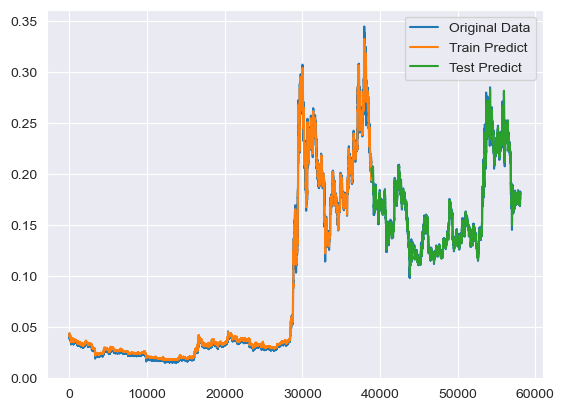

In [64]:
predict1 = np.full((len(dataset)), np.nan)
predict1[look_back:len(trainPredict)+look_back] = trainPredict
predict2 = np.full((len(dataset)), np.nan)
predict2[len(trainPredict)+(look_back*2):len(dataset)] = testPredict
# 仅绘制原始数据的第一列（乘客数量）
plt.plot(scaler.inverse_transform(dataset)[:, 3], label='Original Data')
plt.plot(predict1, label='Train Predict')
plt.plot(predict2, label='Test Predict')
plt.legend()
plt.show()

In [63]:
(dataframe.describe())
print(predict1.shape)
dataframe['predict'] = predict
dataframe[['close_price', 'predict']].to_csv('data_value.csv')

(58078,)
